In [2]:
!nvidia-smi

Sat Sep 26 09:54:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install tensorflow==1.5.0

     |████████████████████████████████| 44.4MB 69kB/s 
     |████████████████████████████████| 3.0MB 32.3MB/s 
     |████████████████████████████████| 890kB 40.6MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=10164d5fa1dea339251b7c8f91cb652a3d5b376fe22ed28e90b7d423c4cf59dd
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.0
    Uninstalling bleach-3.2.0:
      Successfully uninstalled bleach-3.2.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [4]:
import tensorflow

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarning: Passing (type, 1) or 

In [5]:
tensorflow.__version__

'1.5.0'

In [6]:
!pip install kaggle

In [7]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
mkdir .kaggle

In [9]:
ls -a

./  ../  .config/  drive/  .kaggle/  sample_data/


In [9]:
#cd drive/"My Drive"

In [10]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = {"username":"s13sil1","key":"f17e11f34dad2c3b8f21edfdaa85861a"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [11]:
!chmod 600 /content/.kaggle/kaggle.json

In [12]:
ls -a .kaggle

./  ../  kaggle.json


In [13]:
mkdir　/root/.kaggle/

In [14]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [15]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [16]:
# kaggle APIコマンドが使えるかどうかを確認


!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        286           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        123           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        368           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2413           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18247            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4786            True  
connectx

In [17]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [19]:
# simpsonデータセットのAPIコマンドでデータセットをダウンロードする
# APIコマンドはこちらのサイトを参照。https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

!kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

 99% 1.07G/1.08G [00:35<00:00, 71.9MB/s]
100% 1.08G/1.08G [00:35<00:00, 32.7MB/s]


In [20]:
!unzip /content/drive/'My Drive'/the-simpsons-characters-dataset.zip  -d Simpsons

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset

In [21]:
!git clone https://github.com/duckrabbits/ObjectDetection.git

fatal: destination path 'ObjectDetection' already exists and is not an empty directory.


In [22]:
# https://github.com/duckrabbits/ObjectDetection/tree/master
# この後、上述のgithubのreadmeに沿って、simpsons_datasetフォルダをプロジェクトフォルダ配下に格納しましょう。
# testデータなども同様に準備してみよう。

In [23]:
mv Simpsons/simpsons_dataset ObjectDetection/

In [24]:
mv Simpsons/kaggle_simpson_testset ObjectDetection/

In [25]:
mv Simpsons/characters_illustration.png ObjectDetection/

In [26]:
mv Simpsons/number_pic_char.csv ObjectDetection/

In [27]:
mv Simpsons/weights.best.hdf5 ObjectDetection/

In [28]:
from tensorflow import keras

In [29]:
keras.__version__

'2.1.2-tf'

In [18]:
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 2.8MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [19]:
import keras 

Using TensorFlow backend.


In [20]:
keras.__version__

'2.2.4'

In [21]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/ObjectDetection')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive/ObjectDetection


# 【問題1】学習と推定
READMEを参考に上記実装を動かしてください。

In [34]:
!python train.py -p annotation.txt

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

In [35]:
!python predict.py -i ./kaggle_simpson_testset/kaggle_simpson_testset -c ./save/train_20200925-013707_config.pickle

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

## 時間がかかる為中止した。

# 【問題2】コードリーディング
上記実装のコードリーディングを行ってください。


まず、Faster R-CNN[1]において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。


（例）


- RPNを実現しているコードはどこか
- RoIプーリングを実現しているコードはどこか

フレームワークには畳み込み層など一般的なものはクラスが用意されていますが、RoIプーリングなど特定の手法限定のものは用意されていません。オリジナルのレイヤーを作成することが可能であり、Kerasであれば以下のページに情報がまとまっています。


オリジナルのKerasレイヤーを作成する - Keras Documentation


《参考》


KerasではVGG16のクラスが用意されているため、簡単に利用ができます。include_top=Falseの引数を与えることで、出力のための全結合層部分が除かれます。weights='imagenet'でImageNetを利用した学習済みモデルも手に入り、転移学習 が行えます。weights='None'とすればランダムな初期化となります。


Applications - Keras Documentation



### Faster R-CNNにおいて重要だと考えた部分
- RPN
- Rolプーリング
- アンカーサイズ

### RPNに対応するコード
train.py　69行目<br>
model_rpn, model_classifier, model_all = faster_rcnn.get_model(C, classes_count)

→ faster_rcnn.py 18行目<br>
rpn = nn.rpn(shared_layers, num_anchors)

→ resnet.py　196行目<br>
def rpn(base_layers,num_anchors)

### RoIプーリングに対応するコード
train.py　69行目<br>
model_rpn, model_classifier, model_all = faster_rcnn.get_model(C, classes_count)

→ faster_rcnn.py 21行目<br>
classifier = nn.classifier(shared_layers, roi_input, C.num_rois, nb_classes=len(classes_count), trainable=True)

→ resnet.py　209行目<br>
out_roi_pool = RoiPoolingConv(pooling_regions, num_rois)([base_layers, input_rois])

→ RoiPoolingConv.py 7行目以降<br>
class RoiPoolingConv(Layer)

### アンカーサイズに対応するコード
train.py　69行目<br>
model_rpn, model_classifier, model_all = faster_rcnn.get_model(C, classes_count)

→ faster_rcnn.py 17行目<br>
num_anchors = len(C.anchor_box_scales) * len(C.anchor_box_ratios)

→ config.py　19, 22行目<br>
self.anchor_box_scales = [64, 128, 256, 512]<br>
self.anchor_box_ratios = [[1, 1], [1, 2], [2, 1]]



# 【問題3】学習済みの重みによる推定
学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startの項に記載されています。


まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。


出力結果を課題の一部として提出してください。

In [36]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-09-25 19:23:11--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   383KB/s    in 14m 11s 

2020-09-25 19:37:23 (285 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [37]:
os.chdir('/content/drive/My Drive/')
print(os.getcwd())

/content/drive/My Drive


In [38]:
!git clone https://github.com/qqwweee/keras-yolo3

fatal: destination path 'keras-yolo3' already exists and is not an empty directory.


In [39]:
mv ObjectDetection/weights.best.hdf5 keras-yolo3/

In [40]:
mv ObjectDetection/yolov3.weights keras-yolo3/

In [41]:
mv ObjectDetection/yolov3.weights.1 keras-yolo3/

mv: cannot stat 'ObjectDetection/yolov3.weights.1': No such file or directory


In [42]:
os.chdir('/content/drive/My Drive/keras-yolo3/')
print(os.getcwd())

/content/drive/My Drive/keras-yolo3


In [43]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

In [44]:
os.chdir('/content/drive/My Drive/')
print(os.getcwd())

/content/drive/My Drive


In [45]:
mv dive_into_code/IMG_2632.JPG keras-yolo3/

mv: cannot stat 'dive_into_code/IMG_2632.JPG': No such file or directory


In [46]:
os.chdir('/content/drive/My Drive/keras-yolo3/')
print(os.getcwd())

/content/drive/My Drive/keras-yolo3


In [47]:
!python yolo_video.py --image

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

In [48]:
!python yolo.py

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

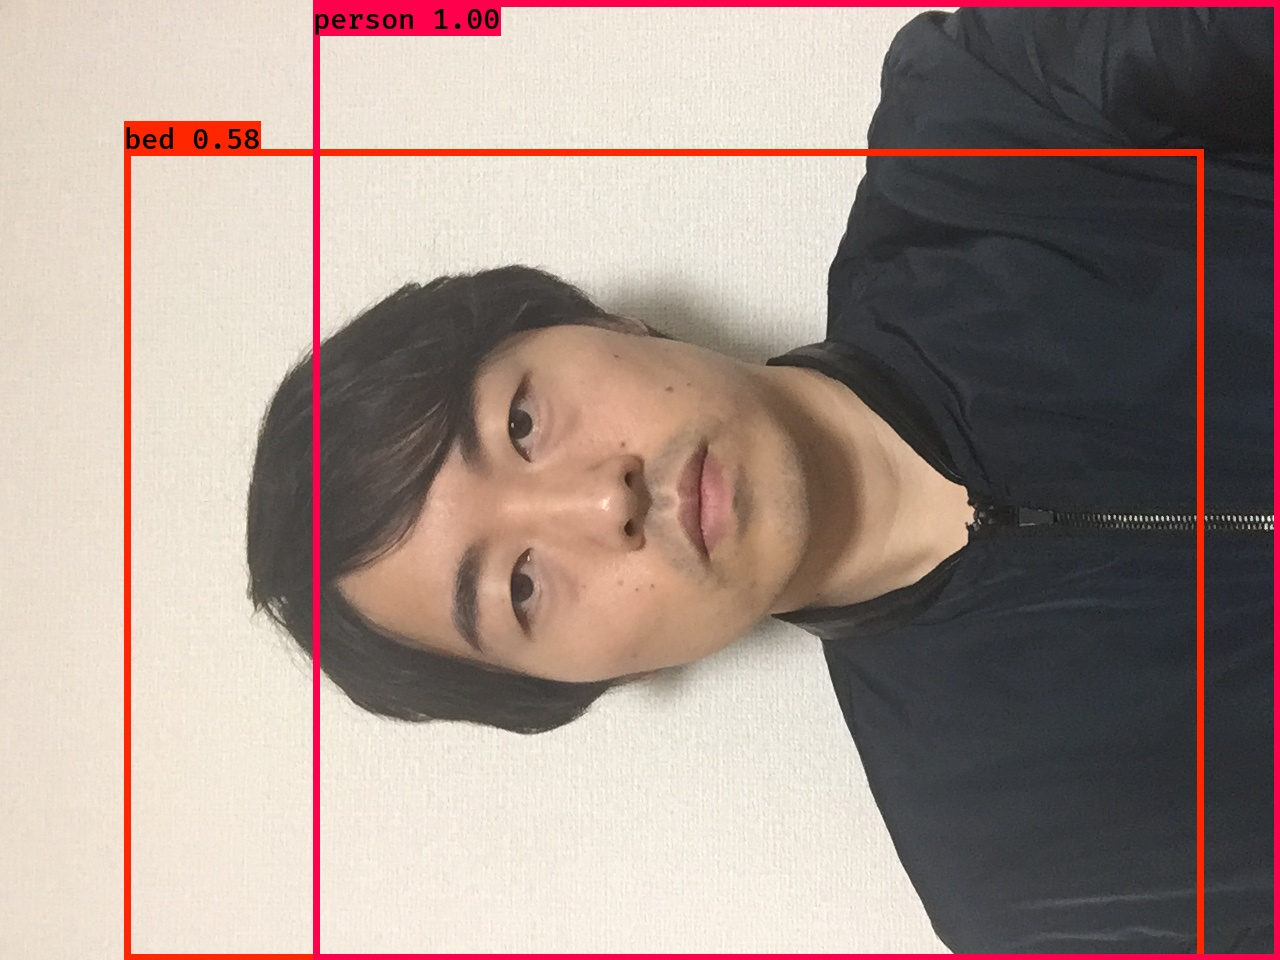

In [49]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('out.jpg'))

## ベッドと判定されたものの、出力結果としては問題無し。

# 【問題4】学習のためのファイルを作成
新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。


アノテーションファイルの形式が問題1の実装とは異なるため変換する必要があります。

In [37]:
os.chdir('/content/drive/My Drive/ObjectDetection/')
print(os.getcwd())

/content/drive/My Drive/ObjectDetection


### アノテーションファイルを作成

In [38]:
filename = 'annotation.txt'
with open(filename, 'r') as f:
	fileText = f.read()
	after = fileText.replace('jpg,', 'jpg ')
	after = after.replace(',abraham_grampa_simpson', ',0')
	after = after.replace(',apu_nahasapeemapetilon', ',1')
	after = after.replace(',bart_simpson', ',2')
	after = after.replace(',charles_montgomery_burns', ',3')
	after = after.replace(',chief_wiggum', ',4')
	after = after.replace(',comic_book_guy', ',5')
	after = after.replace(',edna_krabappel', ',6')
	after = after.replace(',homer_simpson', ',7')
	after = after.replace(',kent_brockman', ',8')
	after = after.replace(',krusty_the_clown', ',9')
	after = after.replace(',lisa_simpson', ',10')
	after = after.replace(',marge_simpson', ',11')
	after = after.replace(',milhouse_van_houten', ',12')
	after = after.replace(',moe_szyslak', ',13')
	after = after.replace(',ned_flanders', ',14')
	after = after.replace(',nelson_muntz', ',15')
	after = after.replace(',principal_skinner', ',16')
	after = after.replace(',sideshow_bob', ',17')

	print(after)

filename = 'annotaiton_yolo.txt'
with open(filename, 'w') as f:
	f.write(after)

simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg 57,72,52,72,0
simpsons_dataset/abraham_grampa_simpson/pic_0001.jpg 80,31,337,354,0
simpsons_dataset/abraham_grampa_simpson/pic_0002.jpg 128,48,285,407,0
simpsons_dataset/abraham_grampa_simpson/pic_0003.jpg 72,126,158,275,0
simpsons_dataset/abraham_grampa_simpson/pic_0004.jpg 123,61,294,416,0
simpsons_dataset/abraham_grampa_simpson/pic_0005.jpg 115,18,498,413,0
simpsons_dataset/abraham_grampa_simpson/pic_0006.jpg 171,47,423,413,0
simpsons_dataset/abraham_grampa_simpson/pic_0007.jpg 120,53,381,409,0
simpsons_dataset/abraham_grampa_simpson/pic_0008.jpg 149,56,398,406,0
simpsons_dataset/abraham_grampa_simpson/pic_0009.jpg 205,41,470,456,0
simpsons_dataset/abraham_grampa_simpson/pic_0010.jpg 71,29,265,424,0
simpsons_dataset/abraham_grampa_simpson/pic_0011.jpg 2,24,176,408,0
simpsons_dataset/abraham_grampa_simpson/pic_0012.jpg 132,166,240,346,0
simpsons_dataset/abraham_grampa_simpson/pic_0013.jpg 61,38,418,404,0
simpsons_dataset/abraham_gr

### クラスファイルを作成

In [52]:
path_w = '/content/drive/My Drive/ObjectDetection/class_names.txt'

s = '''abraham_grampa_simpson\napu_nahasapeemapetilon\nbart_simpson\ncharles_montgomery_burns\nchief_wiggum\ncomic_book_guy\nedna_krabappel\nhomer_simpson\nkent_brockman\nkrusty_the_clown\nlisa_simpson\nmarge_simpson\nmilhouse_van_houten\nmoe_szyslak\nned_flanders\nnelson_muntz\nprincipal_skinner\nsideshow_bob'''

with open(path_w, mode='w') as f:
    f.write(s)

with open(path_w) as f:
    print(f.read())

abraham_grampa_simpson
apu_nahasapeemapetilon
bart_simpson
charles_montgomery_burns
chief_wiggum
comic_book_guy
edna_krabappel
homer_simpson
kent_brockman
krusty_the_clown
lisa_simpson
marge_simpson
milhouse_van_houten
moe_szyslak
ned_flanders
nelson_muntz
principal_skinner
sideshow_bob


### 【問題5】学習が行えることの確認
問題4で作成したファイルを使用して学習してください。実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。

In [45]:
os.chdir('/content/drive/My Drive')
print(os.getcwd())

/content/drive/My Drive


In [32]:
mv ObjectDetection/annotaiton_yolo_to.txt keras-yolo3/

In [55]:
mv ObjectDetection/class_names.txt keras-yolo3/

In [23]:
os.chdir('/content/drive/My Drive/keras-yolo3')
print(os.getcwd())

/content/drive/My Drive/keras-yolo3


In [41]:
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

In [58]:
mv ../ObjectDetection/simpsons_dataset/ ./simpsons_dataset

In [59]:
mv class_names.txt model_data

In [24]:
!python train.py

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

### RAMクラッシュ？となり学習が進まない為、ここまでとした。

### 【問題6】（アドバンス課題）コードリーディング
上記実装のコードリーディングを行ってください。


まず、YOLOv3[2]の論文において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。

回答無し